In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import numpy as np

## read_gff

In [25]:
def read_gff(file_name, sep='\t', names=['Chromosome', 'Source', 'Type', 'Start', 
            'End', 'Score', 'Strand', 'Phase', 'Attributes'], skiprows=1):
    return pd.read_csv(file_name, sep=sep, names=names, skiprows=skiprows)

In [26]:
table_1 = read_gff('rrna_annotation.gff')

In [27]:
table_1.head()

,Chromosome,Source,Type,Start,End,Score,Strand,Phase,Attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,Name=16S_rRNA;product=16S ribosomal RNA
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.0,+,.,Name=23S_rRNA;product=23S ribosomal RNA
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.0,+,.,Name=16S_rRNA;product=16S ribosomal RNA
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.0,+,.,Name=23S_rRNA;product=23S ribosomal RNA
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.0,-,.,Name=23S_rRNA;product=23S ribosomal RNA


In [28]:
table_1.dtypes

Chromosome     object
Source         object
Type           object
Start           int64
End             int64
Score         float64
Strand         object
Phase          object
Attributes     object
dtype: object

In [29]:
table_1['Attributes'] = table_1['Attributes'].str.split(pat='=', n=-1, 
                        expand=True)[1].str.split(pat='_', n=-1, expand=True)[0]

In [30]:
table_1.head()

,Chromosome,Source,Type,Start,End,Score,Strand,Phase,Attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.0,+,.,23S
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.0,+,.,16S
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.0,+,.,23S
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.0,-,.,23S


## rRNA_barplot

In [31]:
RNA_type = table_1.groupby(['Chromosome', 'Attributes']).agg({'Attributes':'count'})

In [32]:
RNA_type = RNA_type.rename(columns={'Attributes':'Counts'})

In [33]:
RNA_type = RNA_type.reset_index()

In [34]:
RNA_type

,Chromosome,Attributes,Counts
0,Reference_1,16S,2
1,Reference_1,23S,2
2,Reference_1,5S,2
3,Reference_10,16S,5
4,Reference_10,23S,5
...,...,...,...
71,Reference_8,16S,2
72,Reference_8,23S,2
73,Reference_9,16S,6
74,Reference_9,23S,6


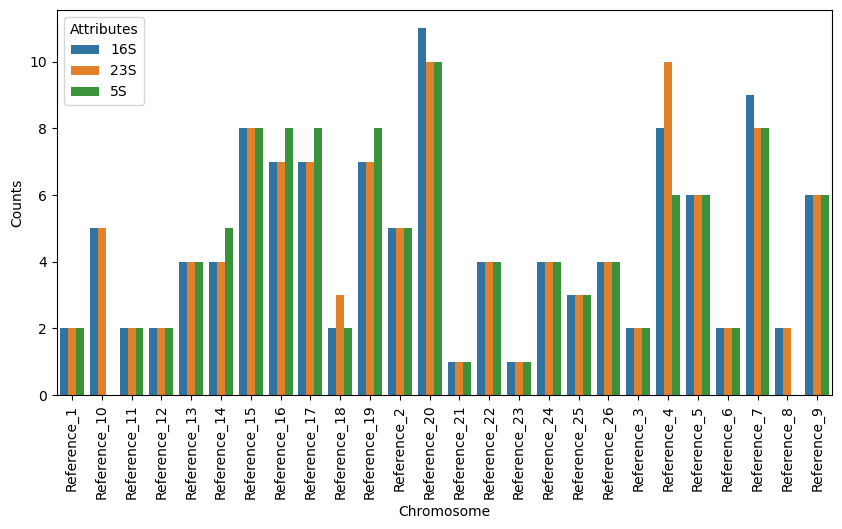

In [35]:
plt.figure(figsize=(10,5))
chart = sns.barplot(data=RNA_type, x="Chromosome", y="Counts", hue="Attributes")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

## read_bed6

In [36]:
def read_bed6(file_name, sep='\t', names=['Chromosome', 'Start', 'End', 
            'Contig_info', 'Some_number', 'Strand']):
    return pd.read_csv(file_name, sep=sep, names=names)

In [37]:
table_2 = read_bed6('alignment.bed')

In [38]:
table_2.head()

,Chromosome,Start,End,Contig_info,Some_number,Strand
0,Reference_1,197681,200286,NODE_1445_length_2603_cov_1135.593799,41,-
1,Reference_1,202886,202996,NODE_19543_length_110_cov_1549.290909,0,-
2,Reference_1,202941,203377,NODE_5666_length_436_cov_418.653543,16,+
3,Reference_1,203322,785222,NODE_25_length_581906_cov_146.024228,60,+
4,Reference_1,785169,1763981,NODE_11_length_978812_cov_132.517515,60,-


In [39]:
table_2.dtypes

Chromosome     object
Start           int64
End             int64
Contig_info    object
Some_number     int64
Strand         object
dtype: object

## intersect

In [40]:
table_intersect = table_1.merge(table_2, how='cross')

In [41]:
table_intersect = table_intersect.query("Start_x >= Start_y and End_x <= End_y and \
                                        Chromosome_x == Chromosome_y").drop(columns=['Chromosome_y'])

In [42]:
table_intersect

,Chromosome_x,Source,Type,Start_x,End_x,Score,Strand_x,Phase,Attributes,Start_y,End_y,Contig_info,Some_number,Strand_y
80256,Reference_11,barrnap:0.9,rRNA,924358,925855,0.000000e+00,+,.,16S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
87966,Reference_11,barrnap:0.9,rRNA,926697,929642,0.000000e+00,+,.,23S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
95676,Reference_11,barrnap:0.9,rRNA,929827,929936,1.400000e-12,+,.,5S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
103391,Reference_11,barrnap:0.9,rRNA,2074460,2075957,0.000000e+00,+,.,16S,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
111101,Reference_11,barrnap:0.9,rRNA,2076799,2079744,0.000000e+00,+,.,23S,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571646,Reference_14,barrnap:0.9,rRNA,2433040,2433152,2.000000e-12,-,.,5S,2433027,2433434,NODE_6108_length_407_cov_1153.232955,0,+
2594791,Reference_14,barrnap:0.9,rRNA,3766952,3767064,2.000000e-12,-,.,5S,3766939,3767346,NODE_6108_length_407_cov_1153.232955,0,+
2620808,Reference_25,barrnap:0.9,rRNA,1329370,1329473,2.900000e-10,-,.,5S,1329345,1329810,NODE_5333_length_465_cov_547.609756,0,-
2659425,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,5S,1822575,1823040,NODE_5333_length_465_cov_547.609756,0,+


## volcano plot

In [43]:
diff_expr = pd.read_csv('diffexpr_data.tsv.gz', sep='\t')

In [44]:
diff_expr.head()

,Sample,logFC,pval,pval_corr,log_pval
0,PNLIP,10.092524,0.659033,1.0,-0.0
1,CELA2A,8.691414,0.582390,1.0,-0.0
2,CLPS,8.054078,0.651733,1.0,-0.0
3,MPO,7.817773,0.448334,1.0,-0.0
4,AMY2A,7.285231,0.632441,1.0,-0.0


In [45]:
import math

math.log10(0.05)

-1.3010299956639813

In [46]:
p_treshold = -math.log10(0.05)

In [47]:
sign_down = diff_expr.query("logFC < 0 and log_pval > @p_treshold")
sign_up = diff_expr.query("logFC > 0 and log_pval > @p_treshold")
nonsign_up = diff_expr.query("logFC > 0 and log_pval <= @p_treshold")
nonsign_down = diff_expr.query("logFC < 0 and log_pval <= @p_treshold")

In [48]:
top_up = sign_up["logFC"].nlargest(n=2)
genes_up = sign_up.loc[sign_up['logFC'].isin(top_up)]

top_down = sign_down["logFC"].nsmallest(n=2)
genes_down = sign_down.loc[sign_down['logFC'].isin(top_down)]

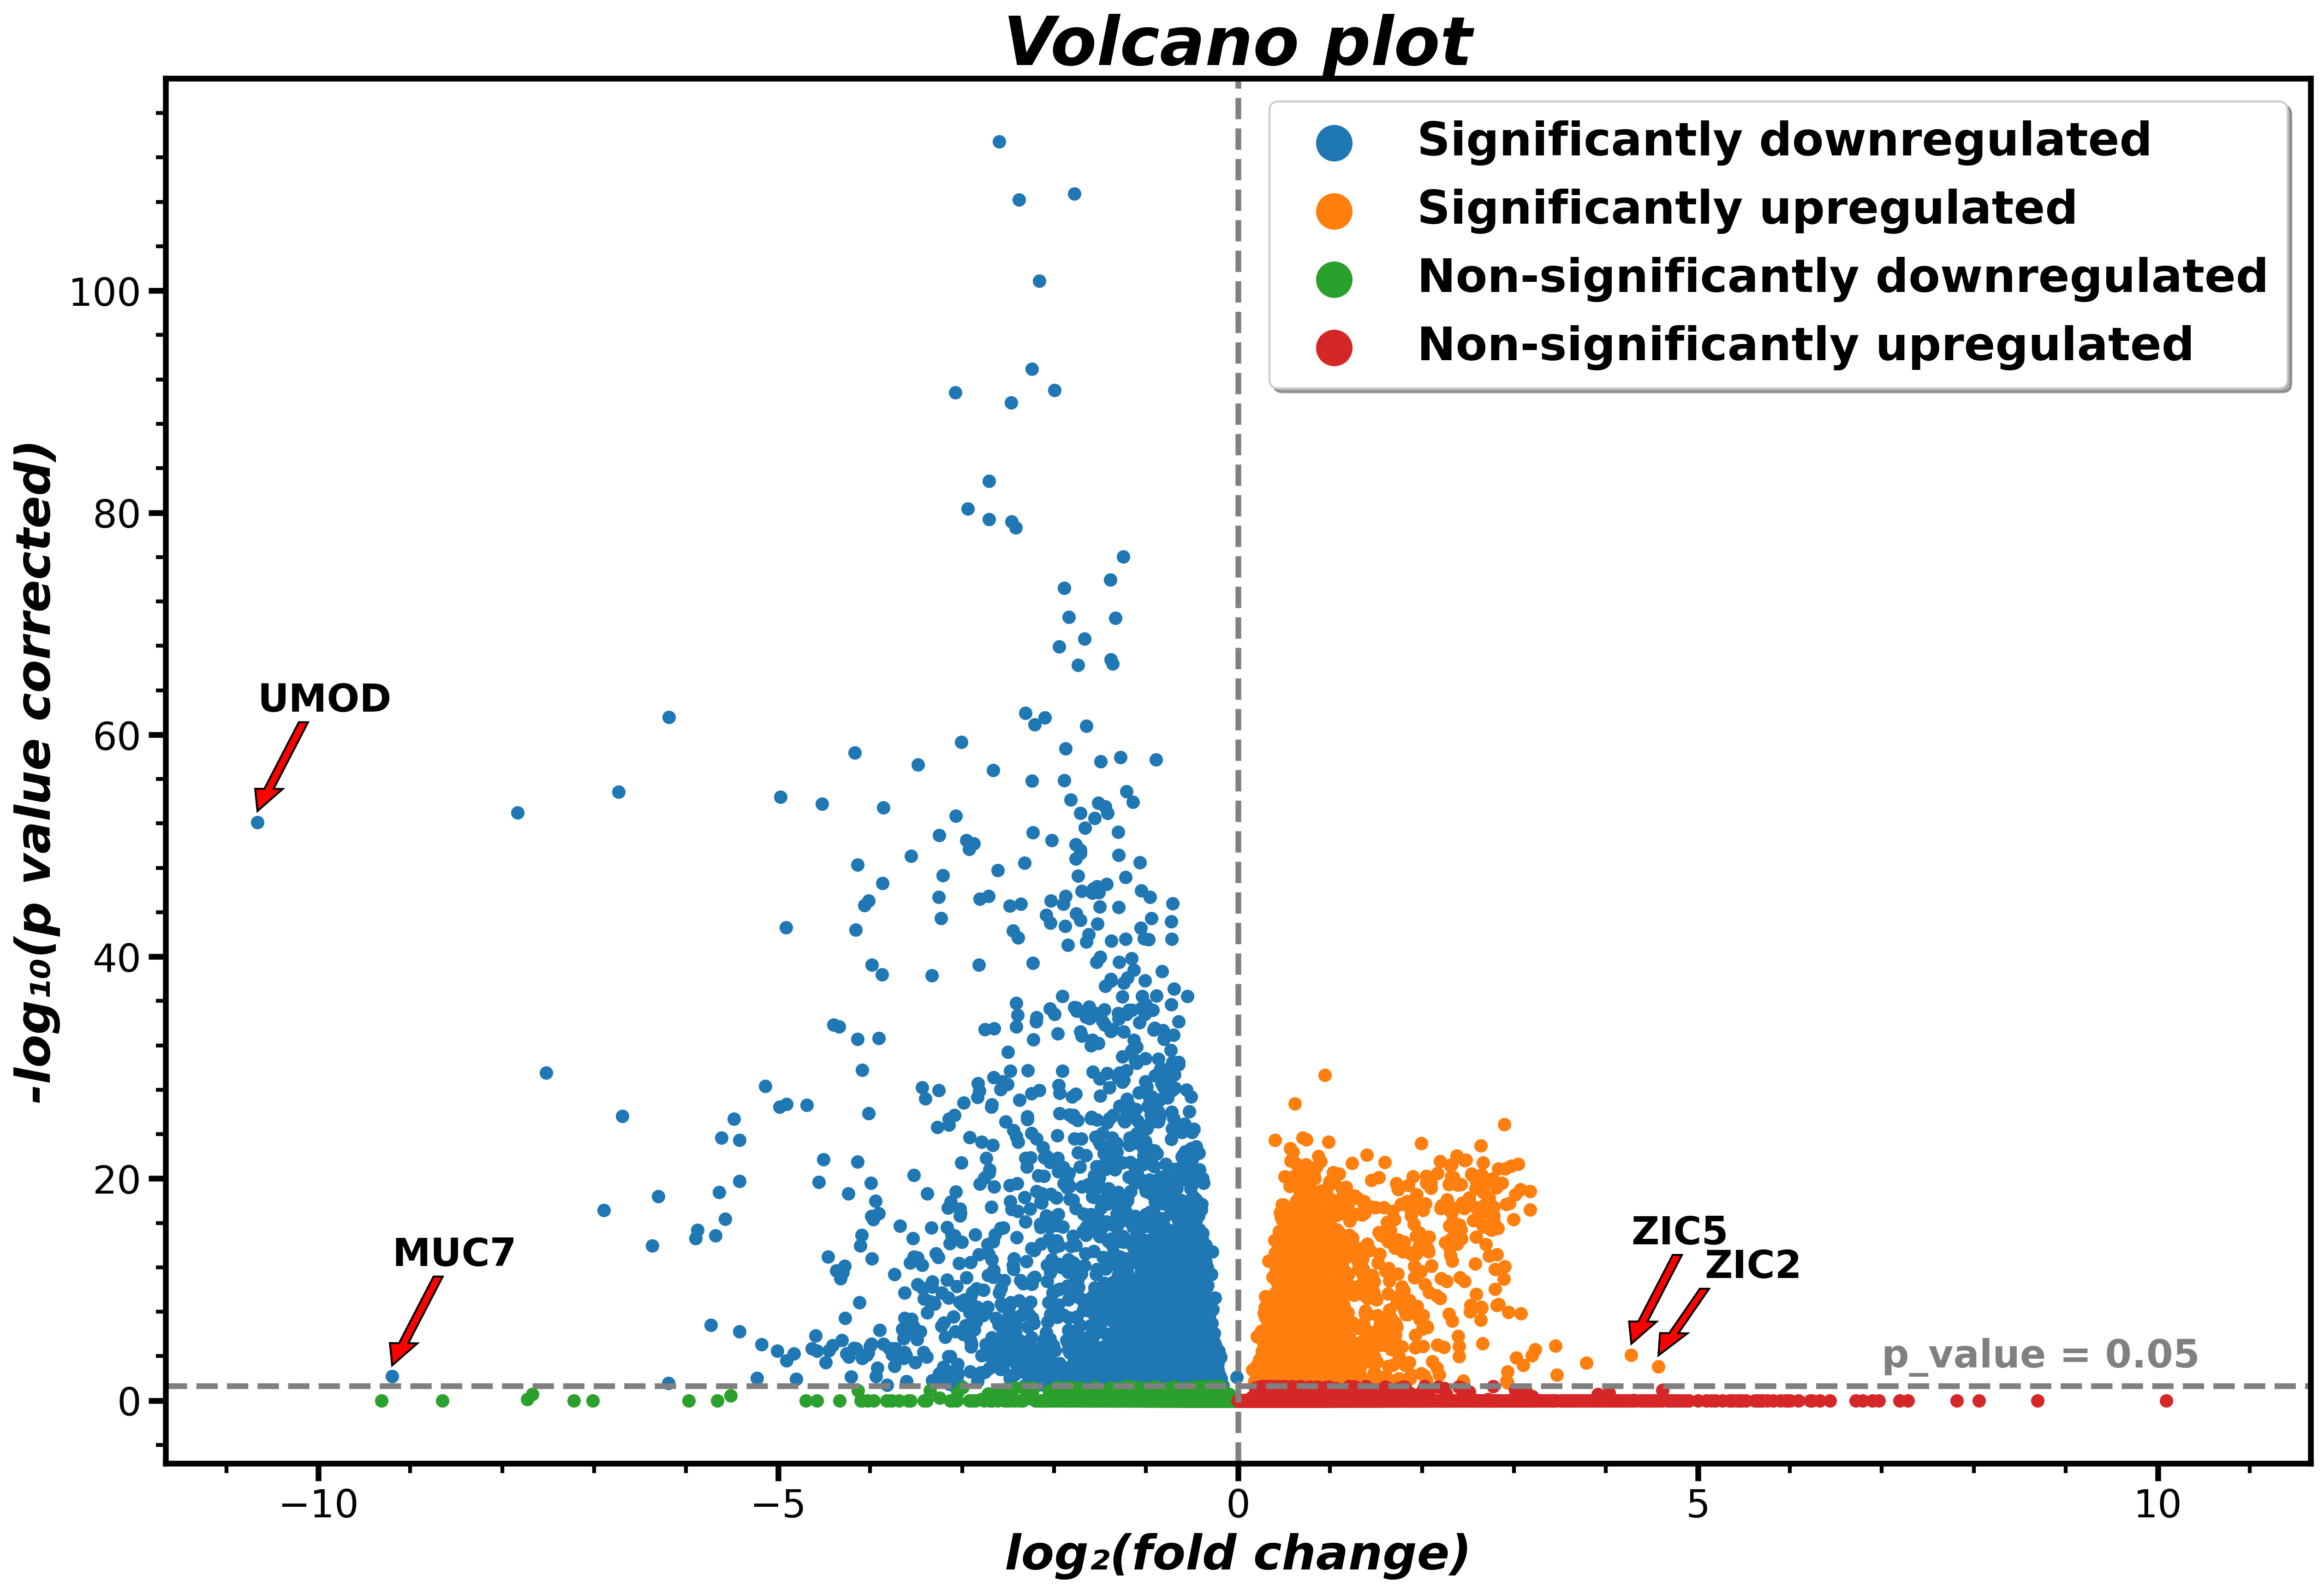

In [49]:
SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")

fig, ax = plt.subplots(figsize=(20,13), dpi=300, linewidth=10)
#ax.set_facecolor('white')

plt.scatter(sign_down["logFC"], sign_down["log_pval"], label='Significantly downregulated')
plt.scatter(sign_up["logFC"], sign_up["log_pval"], label='Significantly upregulated')
plt.scatter(nonsign_down["logFC"], nonsign_down["log_pval"], label='Non-significantly downregulated')
plt.scatter(nonsign_up["logFC"], nonsign_up["log_pval"], label='Non-significantly upregulated')
plt.axhline(-math.log10(0.05), linestyle='dashed', linewidth=3, color='grey')
plt.axvline(linestyle='dashed', linewidth=3, color='grey')
plt.text(7, 3, "p_value = 0.05", fontsize=20, color='grey', fontweight='bold')

plt.xlabel("log2(fold change)".translate(SUB), size=25, style='italic', fontweight='bold')
plt.ylabel("-log10(p value corrected)".translate(SUB), size=25, style='italic', fontweight='bold')
plt.title("Volcano plot", size=35, style='italic', fontweight='bold')

ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(axis='both', which='major', width=3, length=9, labelsize=20)
plt.tick_params(axis='both', which='minor', width=2, length=5, labelsize=8)
limit = max(map(abs,[min(diff_expr["logFC"]), max(diff_expr["logFC"])])) + 1
ax.set_xlim([-limit, limit])

x_ind = genes_down['logFC'].iloc[0]
y_ind = genes_down['log_pval'].iloc[0]
plt.text(x_ind, y_ind+10, genes_down['Sample'].iloc[0], fontsize=20, fontweight='bold')
plt.arrow(x_ind+0.5, y_ind+9, -0.5, -8, width = 0.1, length_includes_head=True, 
          head_length=2, facecolor='red', edgecolor='black')

x_ind = genes_down['logFC'].iloc[1]
y_ind = genes_down['log_pval'].iloc[1]
plt.text(x_ind, y_ind+10, genes_down['Sample'].iloc[1], fontsize=20, fontweight='bold')
plt.arrow(x_ind+0.5, y_ind+9, -0.5, -8, width = 0.1, length_includes_head=True, 
          head_length=2, facecolor='red', edgecolor='black')

x_ind = genes_up['logFC'].iloc[0]
y_ind = genes_up['log_pval'].iloc[0]
plt.text(x_ind+0.5, y_ind+8, genes_up['Sample'].iloc[0], fontsize=20, fontweight='bold')
plt.arrow(x_ind+0.5, y_ind+7, -0.5, -6, width = 0.1, length_includes_head=True, 
          head_length=2, facecolor='red', edgecolor='black')

x_ind = genes_up['logFC'].iloc[1]
y_ind = genes_up['log_pval'].iloc[1]
plt.text(x_ind, y_ind+10, genes_up['Sample'].iloc[1], fontsize=20, fontweight='bold')
plt.arrow(x_ind+0.5, y_ind+9, -0.5, -8, width = 0.1, length_includes_head=True, 
          head_length=2, facecolor='red', edgecolor='black')


[x.set_linewidth(3) for x in ax.spines.values()]
plt.legend(prop={'size': 24, 'weight': 'bold'}, markerscale=3, shadow=True);

## Covid

In [50]:
covid = pd.read_csv("owid-covid-data.csv")

In [51]:
covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [52]:
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2/24/2020,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2/25/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2/26/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2/27/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2/28/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [53]:
# Find the latest date to see the latest statistics
dates = covid['date'].str.split(pat="/", expand=True).rename(columns = {0:'Month', 1: 'Day', 2: 'Year'})
dates.sort_values(['Year', 'Month', 'Day'], ascending=False, inplace=True)
dates.head()

,Month,Day,Year
928,9,9,2022
1889,9,9,2022
2838,9,9,2022
3787,9,9,2022
4730,9,9,2022


In [54]:
latest_data = covid.query('date == "9/9/2022"')

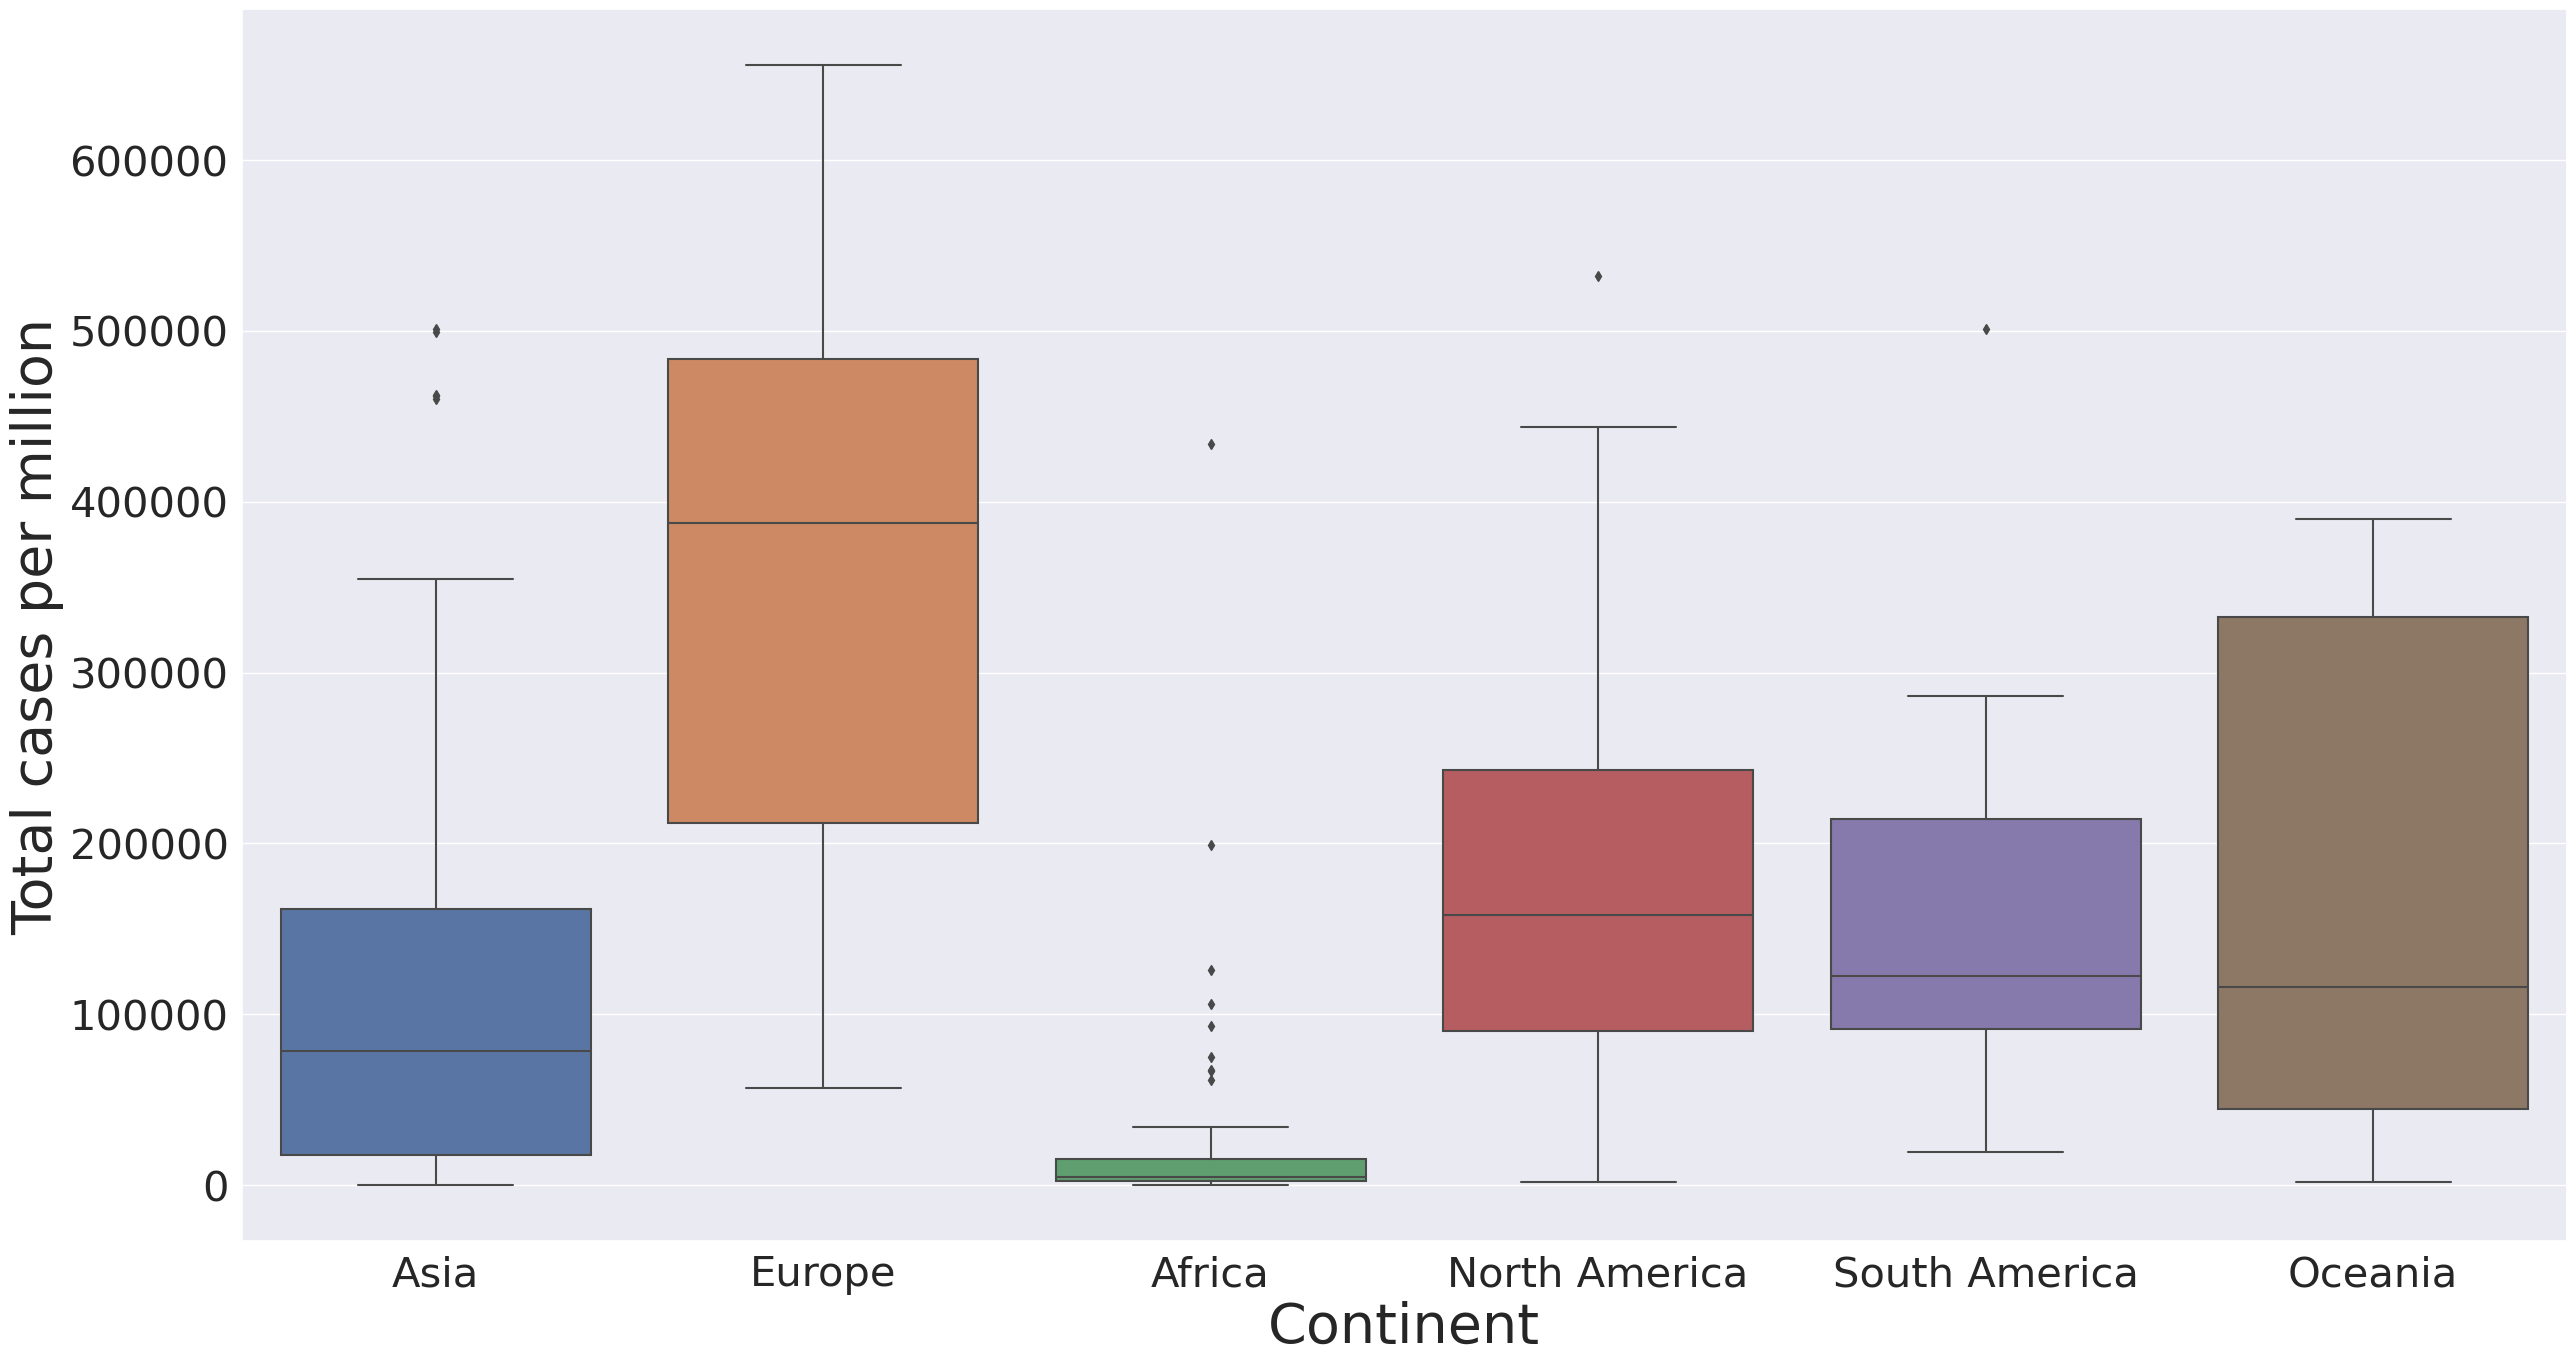

In [55]:
sns.set(rc = {'figure.figsize':(30,16)})
graph = sns.boxplot(x=latest_data['continent'], y=latest_data['total_cases_per_million'])
#graph.axes.set_title("Title",fontsize=50)
graph.set_xlabel("Continent",fontsize=40)
graph.set_ylabel("Total cases per million",fontsize=40)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
#graph.tick_params(labelsize=5)
plt.show()

In Europe there were relatively a lot of cases and in Africa relatively few cases of covid per million.

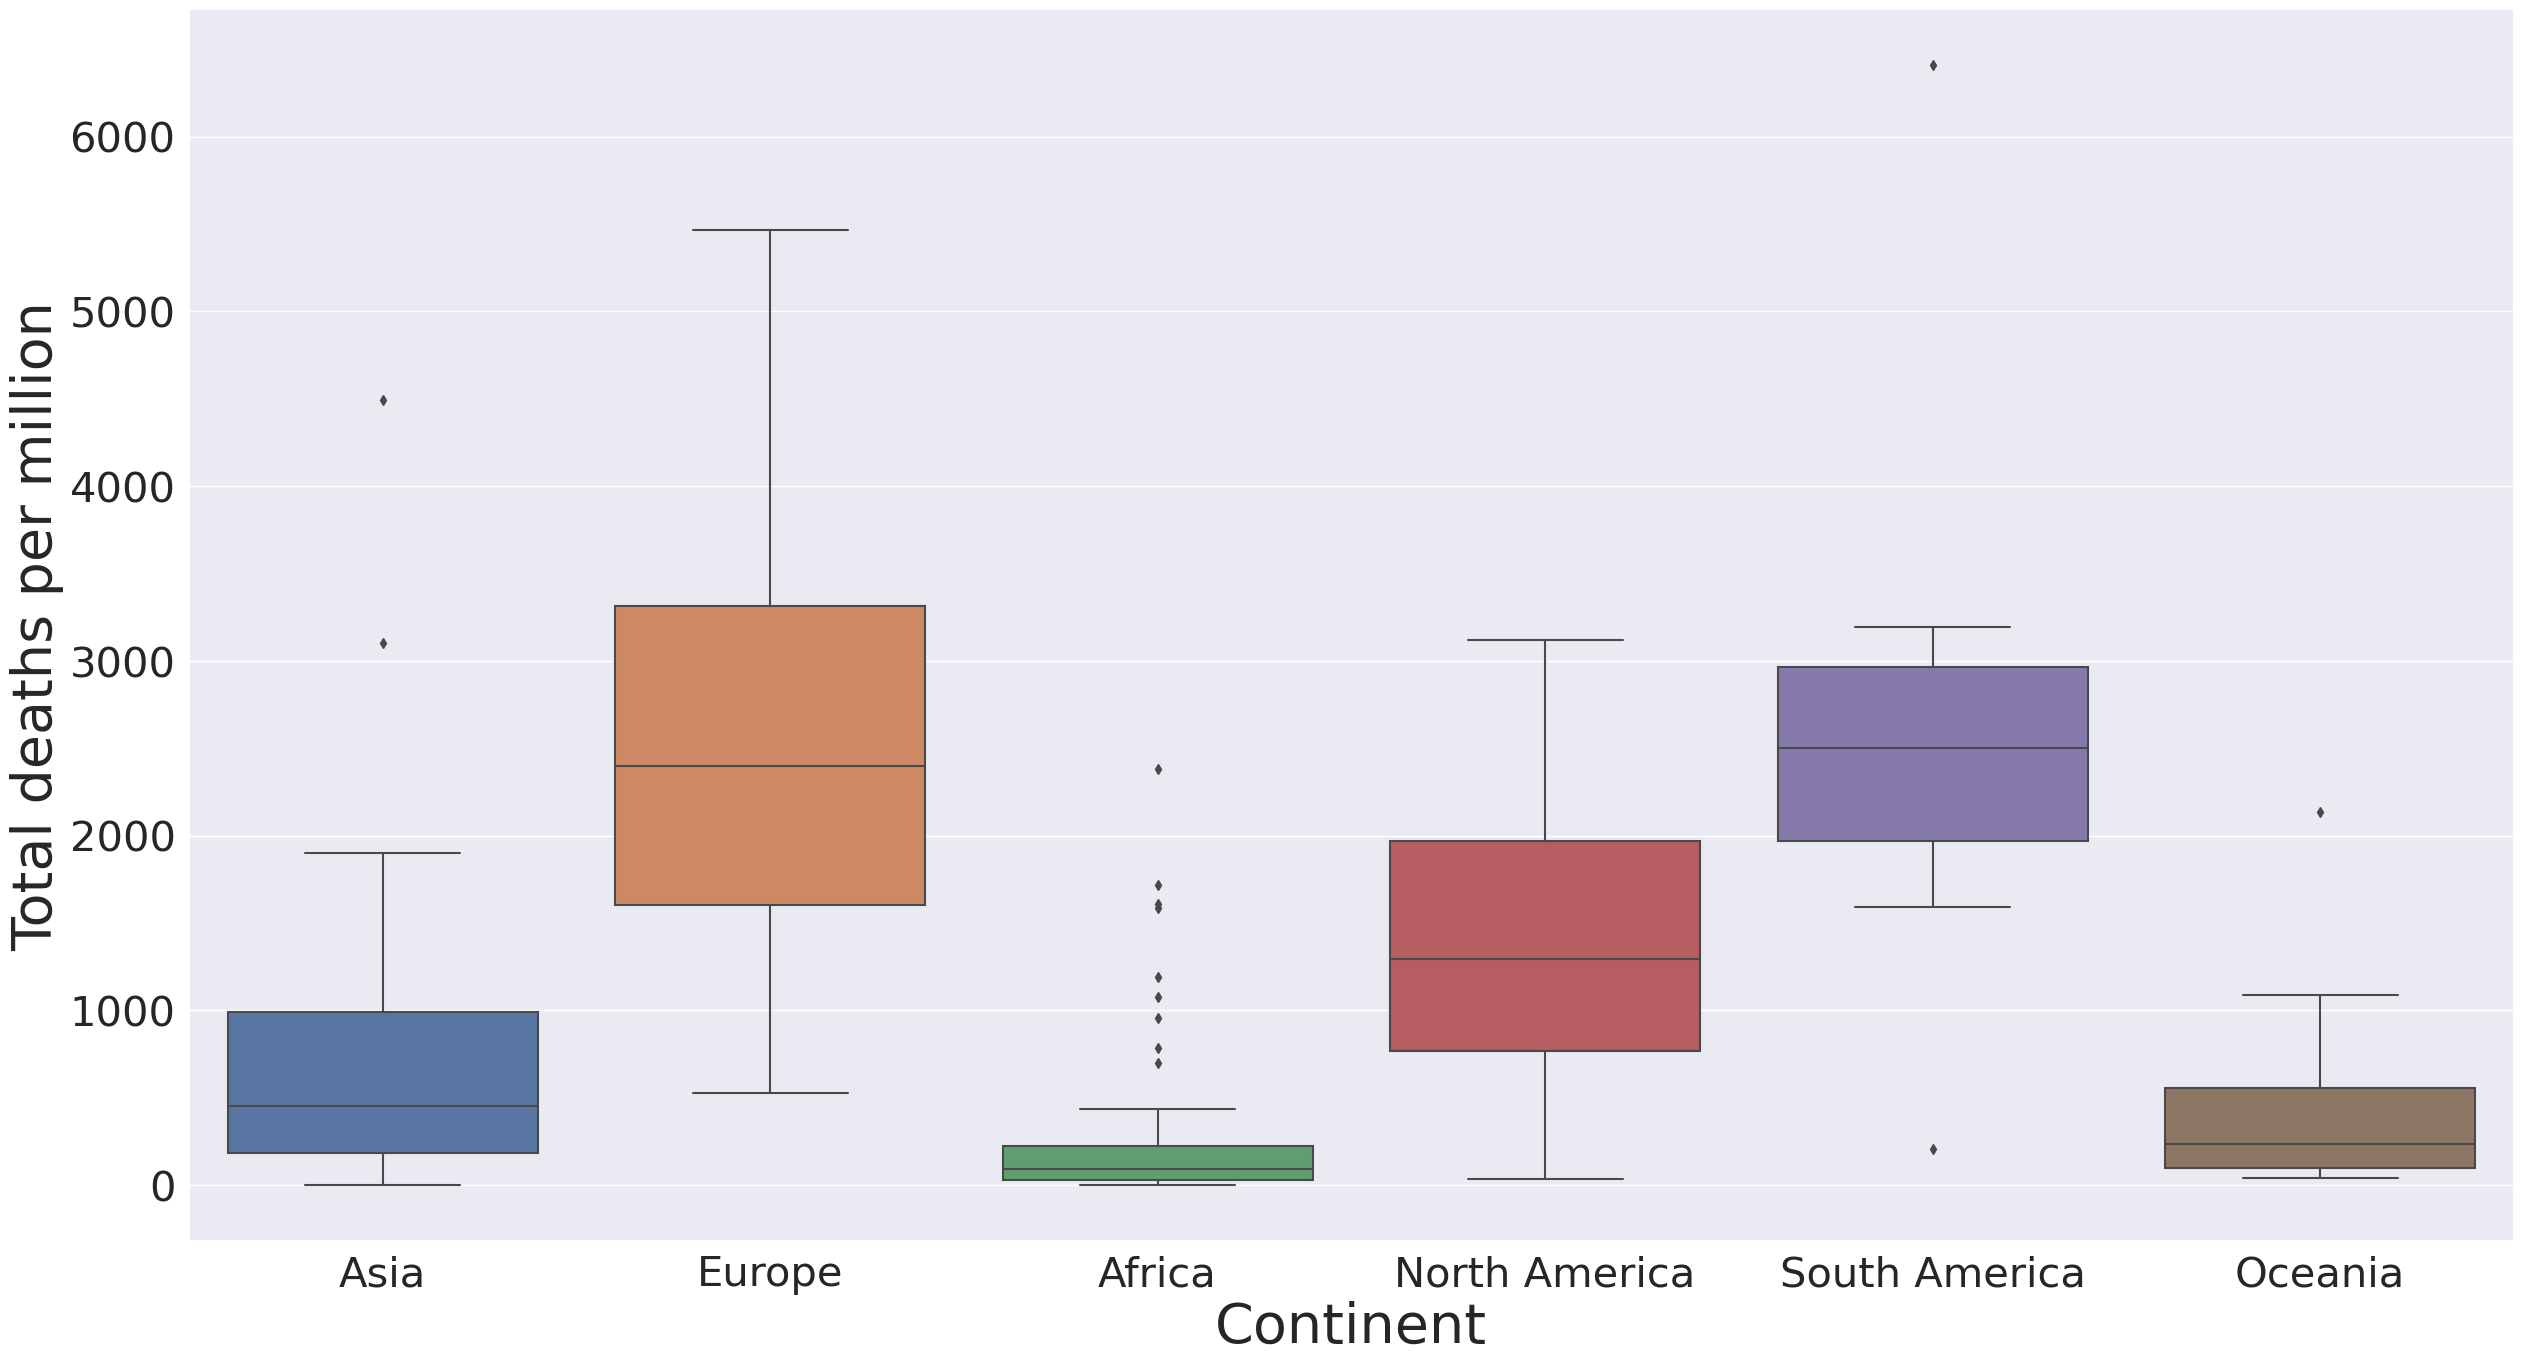

In [56]:
graph = sns.boxplot(x=latest_data['continent'], y=latest_data['total_deaths_per_million'])
#sns.set(rc = {'figure.figsize':(30,16)})
#graph.axes.set_title("Title",fontsize=50)
graph.set_xlabel("Continent",fontsize=40)
graph.set_ylabel("Total deaths per million",fontsize=40)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
#graph.tick_params(labelsize=5)
plt.show()

In Europe there were also quite a lot of deaths per million. Interestingly, there were the same amount of cases per million in North and in South America. But there were more deaths in South America.

In [57]:
#Let's find out whether number of vaccinated people is correlated with number of deaths per million
latest_data['log_vac'] = np.log10(latest_data['people_vaccinated_per_hundred'])

/tmp/ipykernel_8540/86684074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_data['log_vac'] = np.log10(latest_data['people_vaccinated_per_hundred'])


Text(0, 0.5, 'Total death per million')

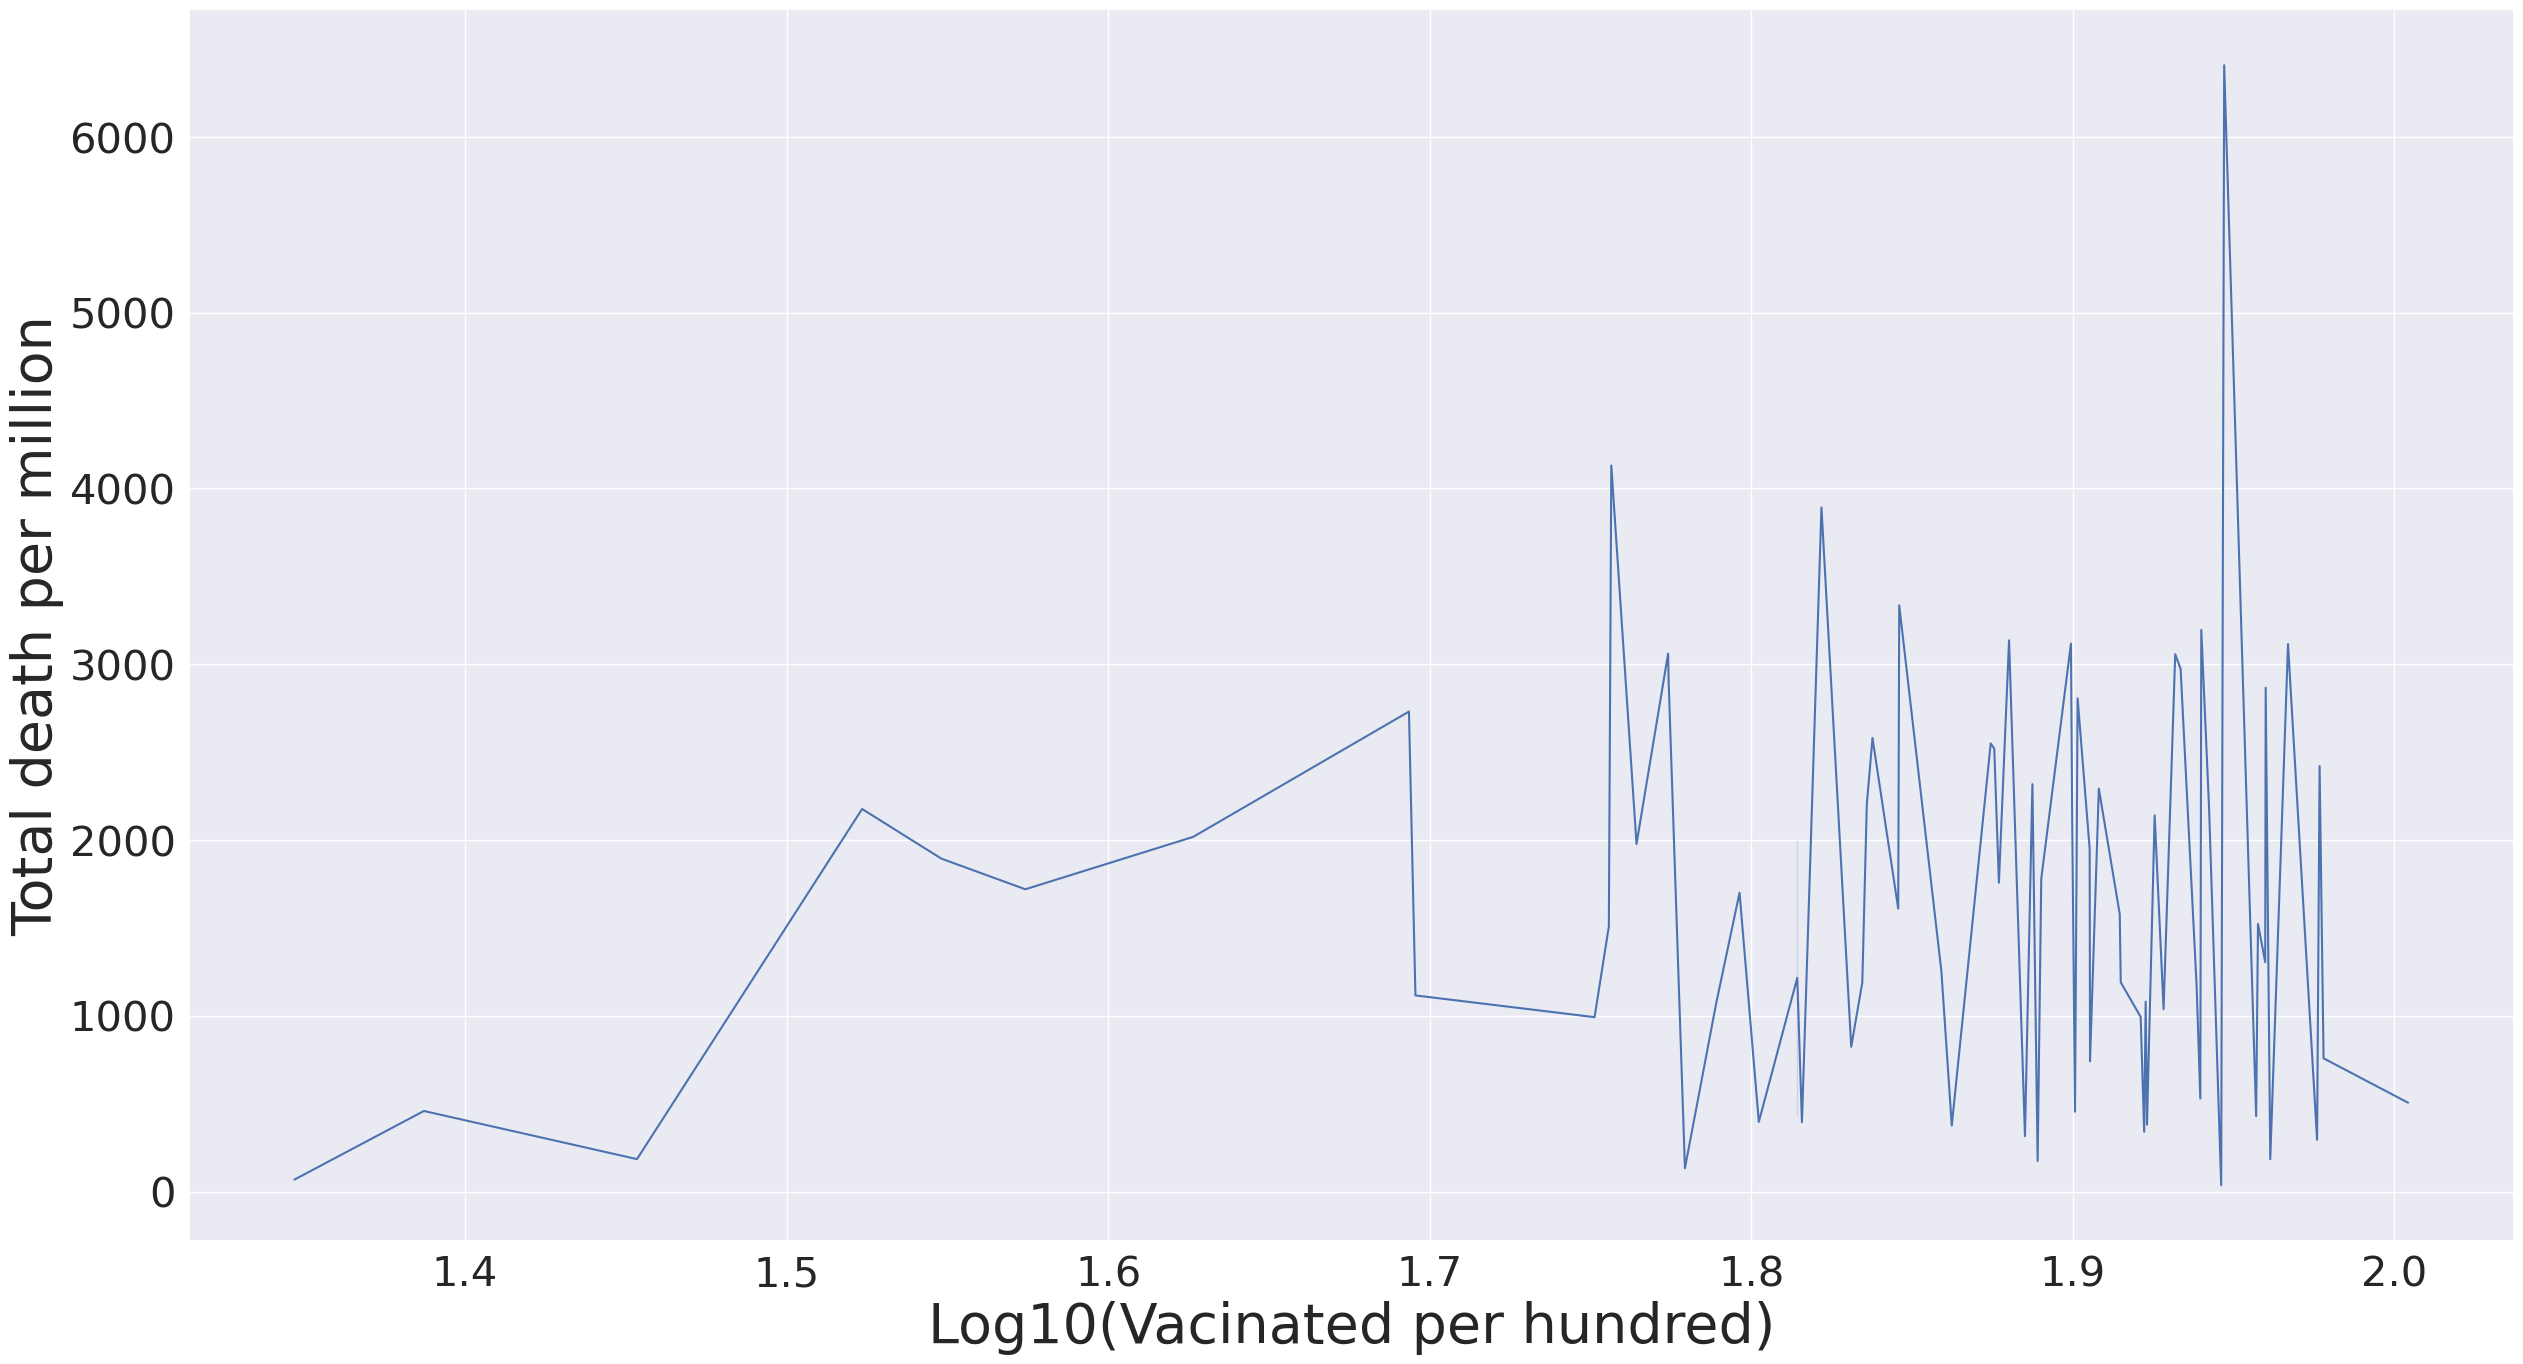

In [58]:
sns.lineplot(x='log_vac', y='total_deaths_per_million', data=latest_data)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlabel('Log10(Vacinated per hundred)', size=40)
plt.ylabel('Total death per million', size=40)

Looks like it makes no sense to get vaccinared...

In [59]:
latest_data['log10_smoker_per_million'] = np.log10((latest_data['female_smokers'] + latest_data['male_smokers']) 
                                     / latest_data['population'] * 10**6)

/tmp/ipykernel_8540/1665192247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_data['log10_smoker_per_million'] = np.log10((latest_data['female_smokers'] + latest_data['male_smokers'])


Text(0, 0.5, 'Total cases per million')

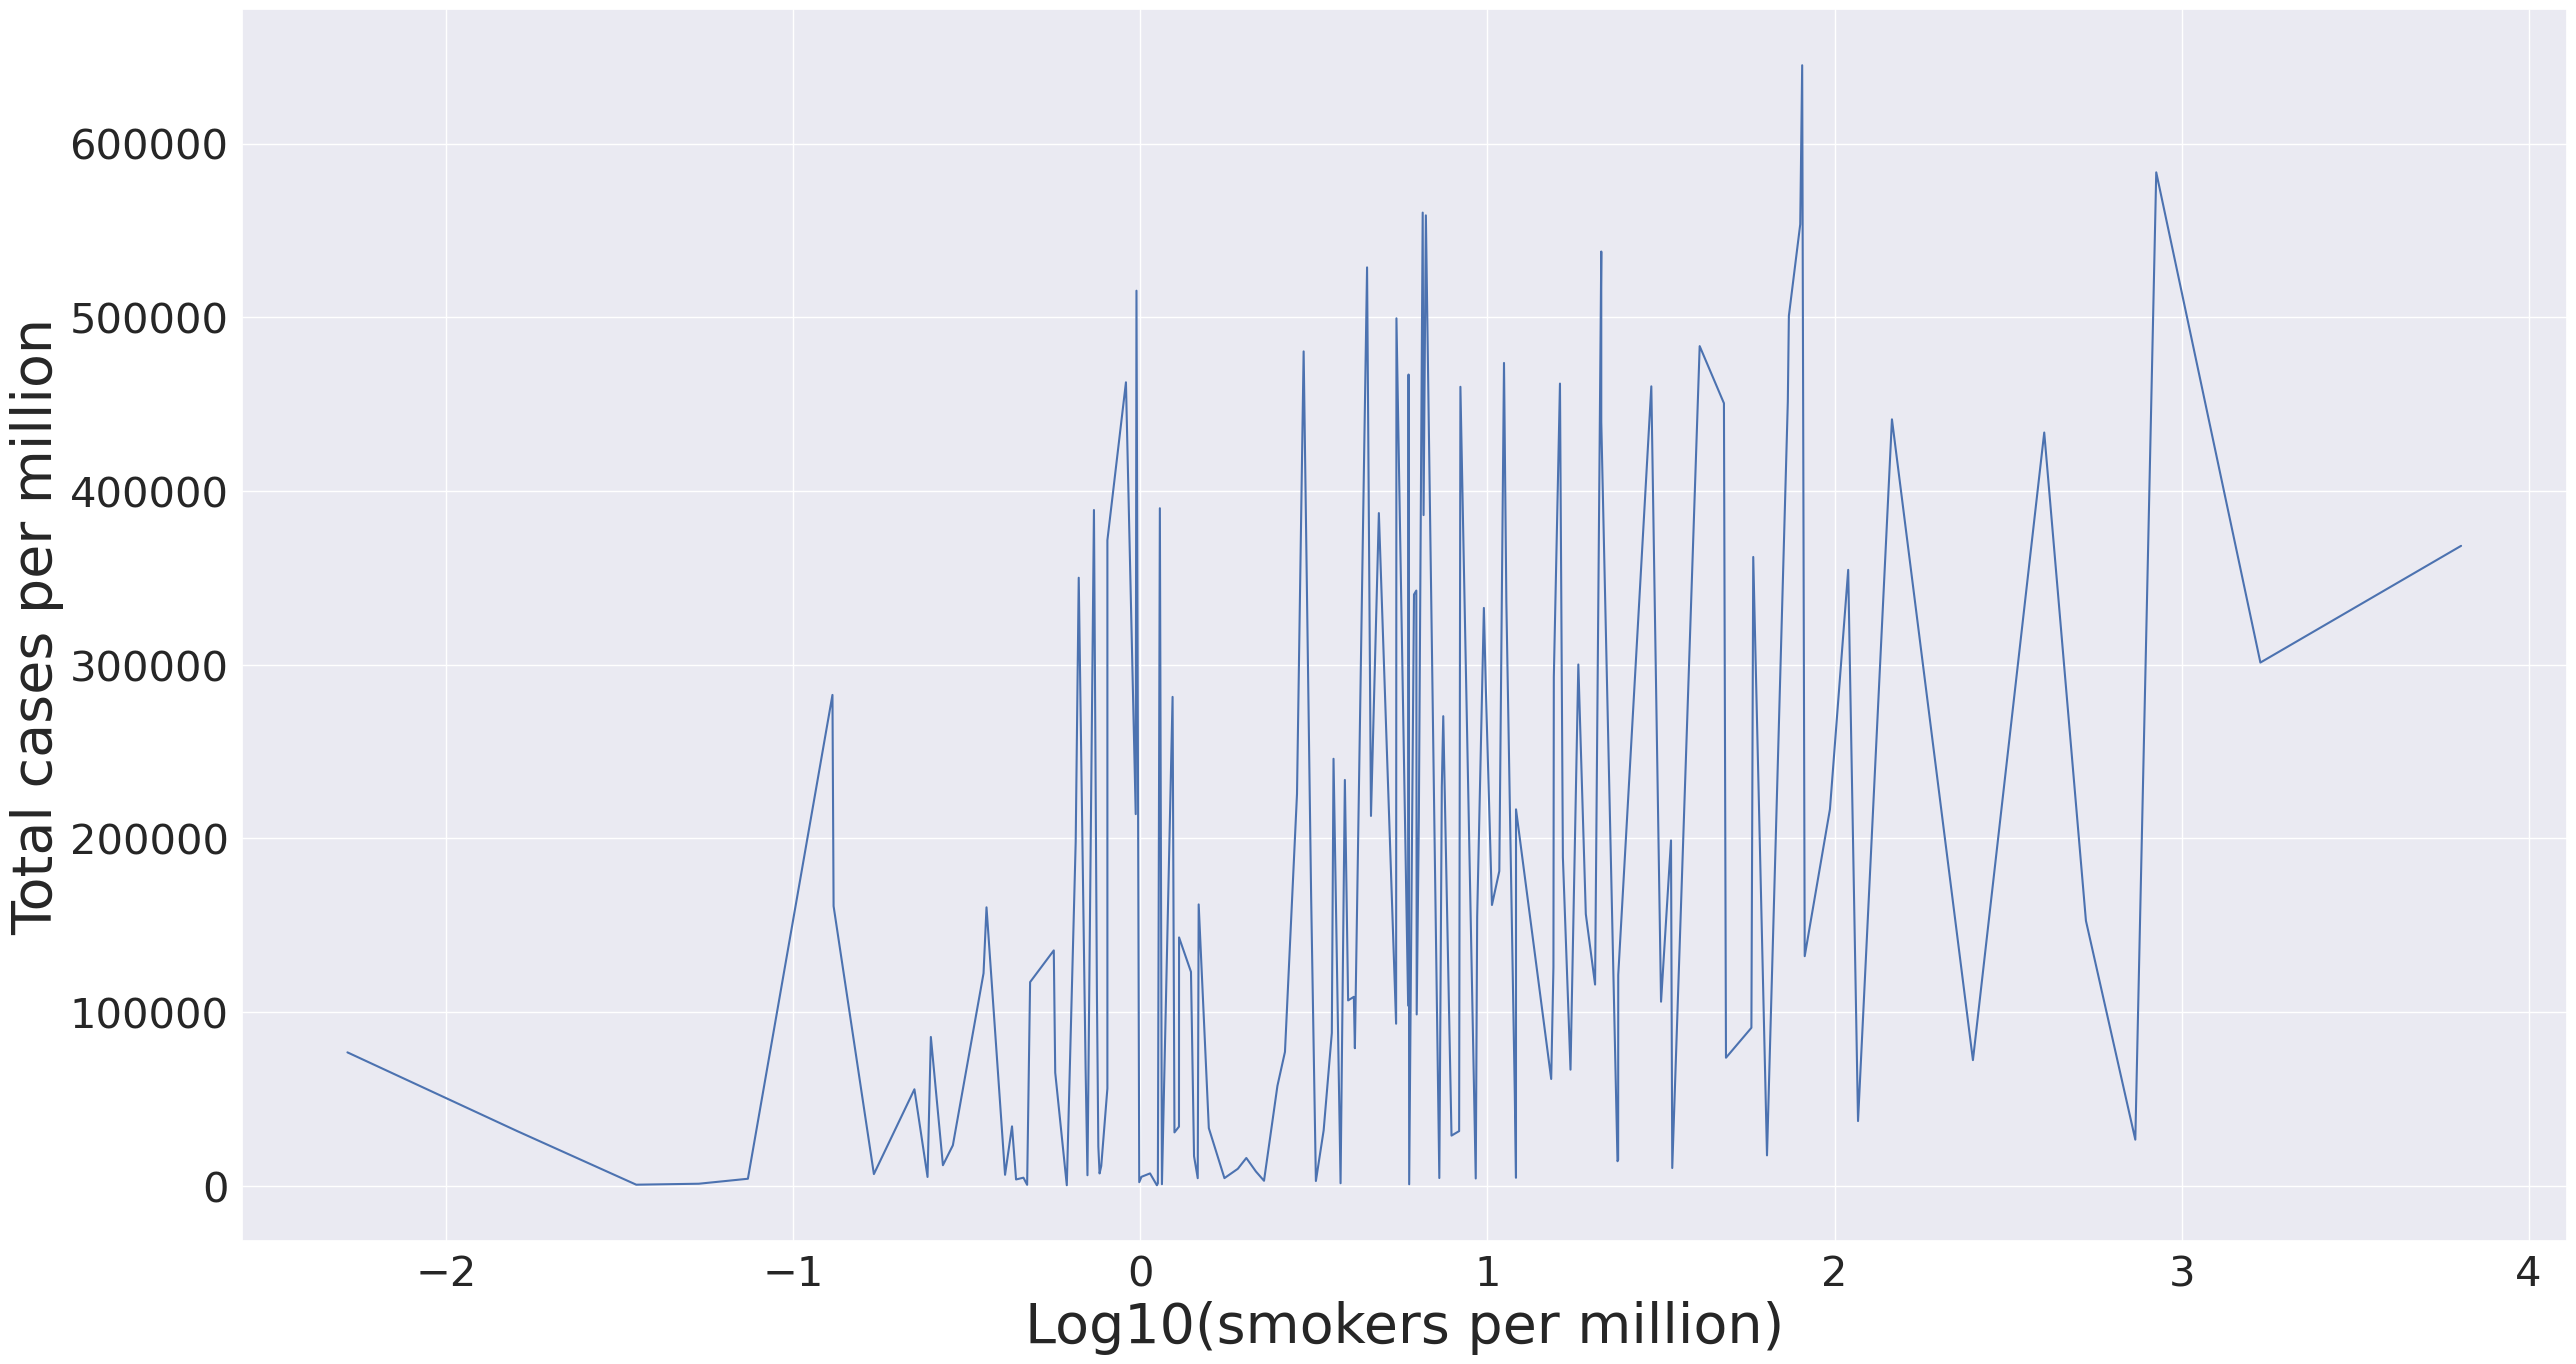

In [60]:
sns.lineplot(x='log10_smoker_per_million', y='total_cases_per_million', data=latest_data)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlabel('Log10(smokers per million)', size=40)
plt.ylabel('Total cases per million', size=40)

Looks like number of cases slightly increases with increasing number of smokers.

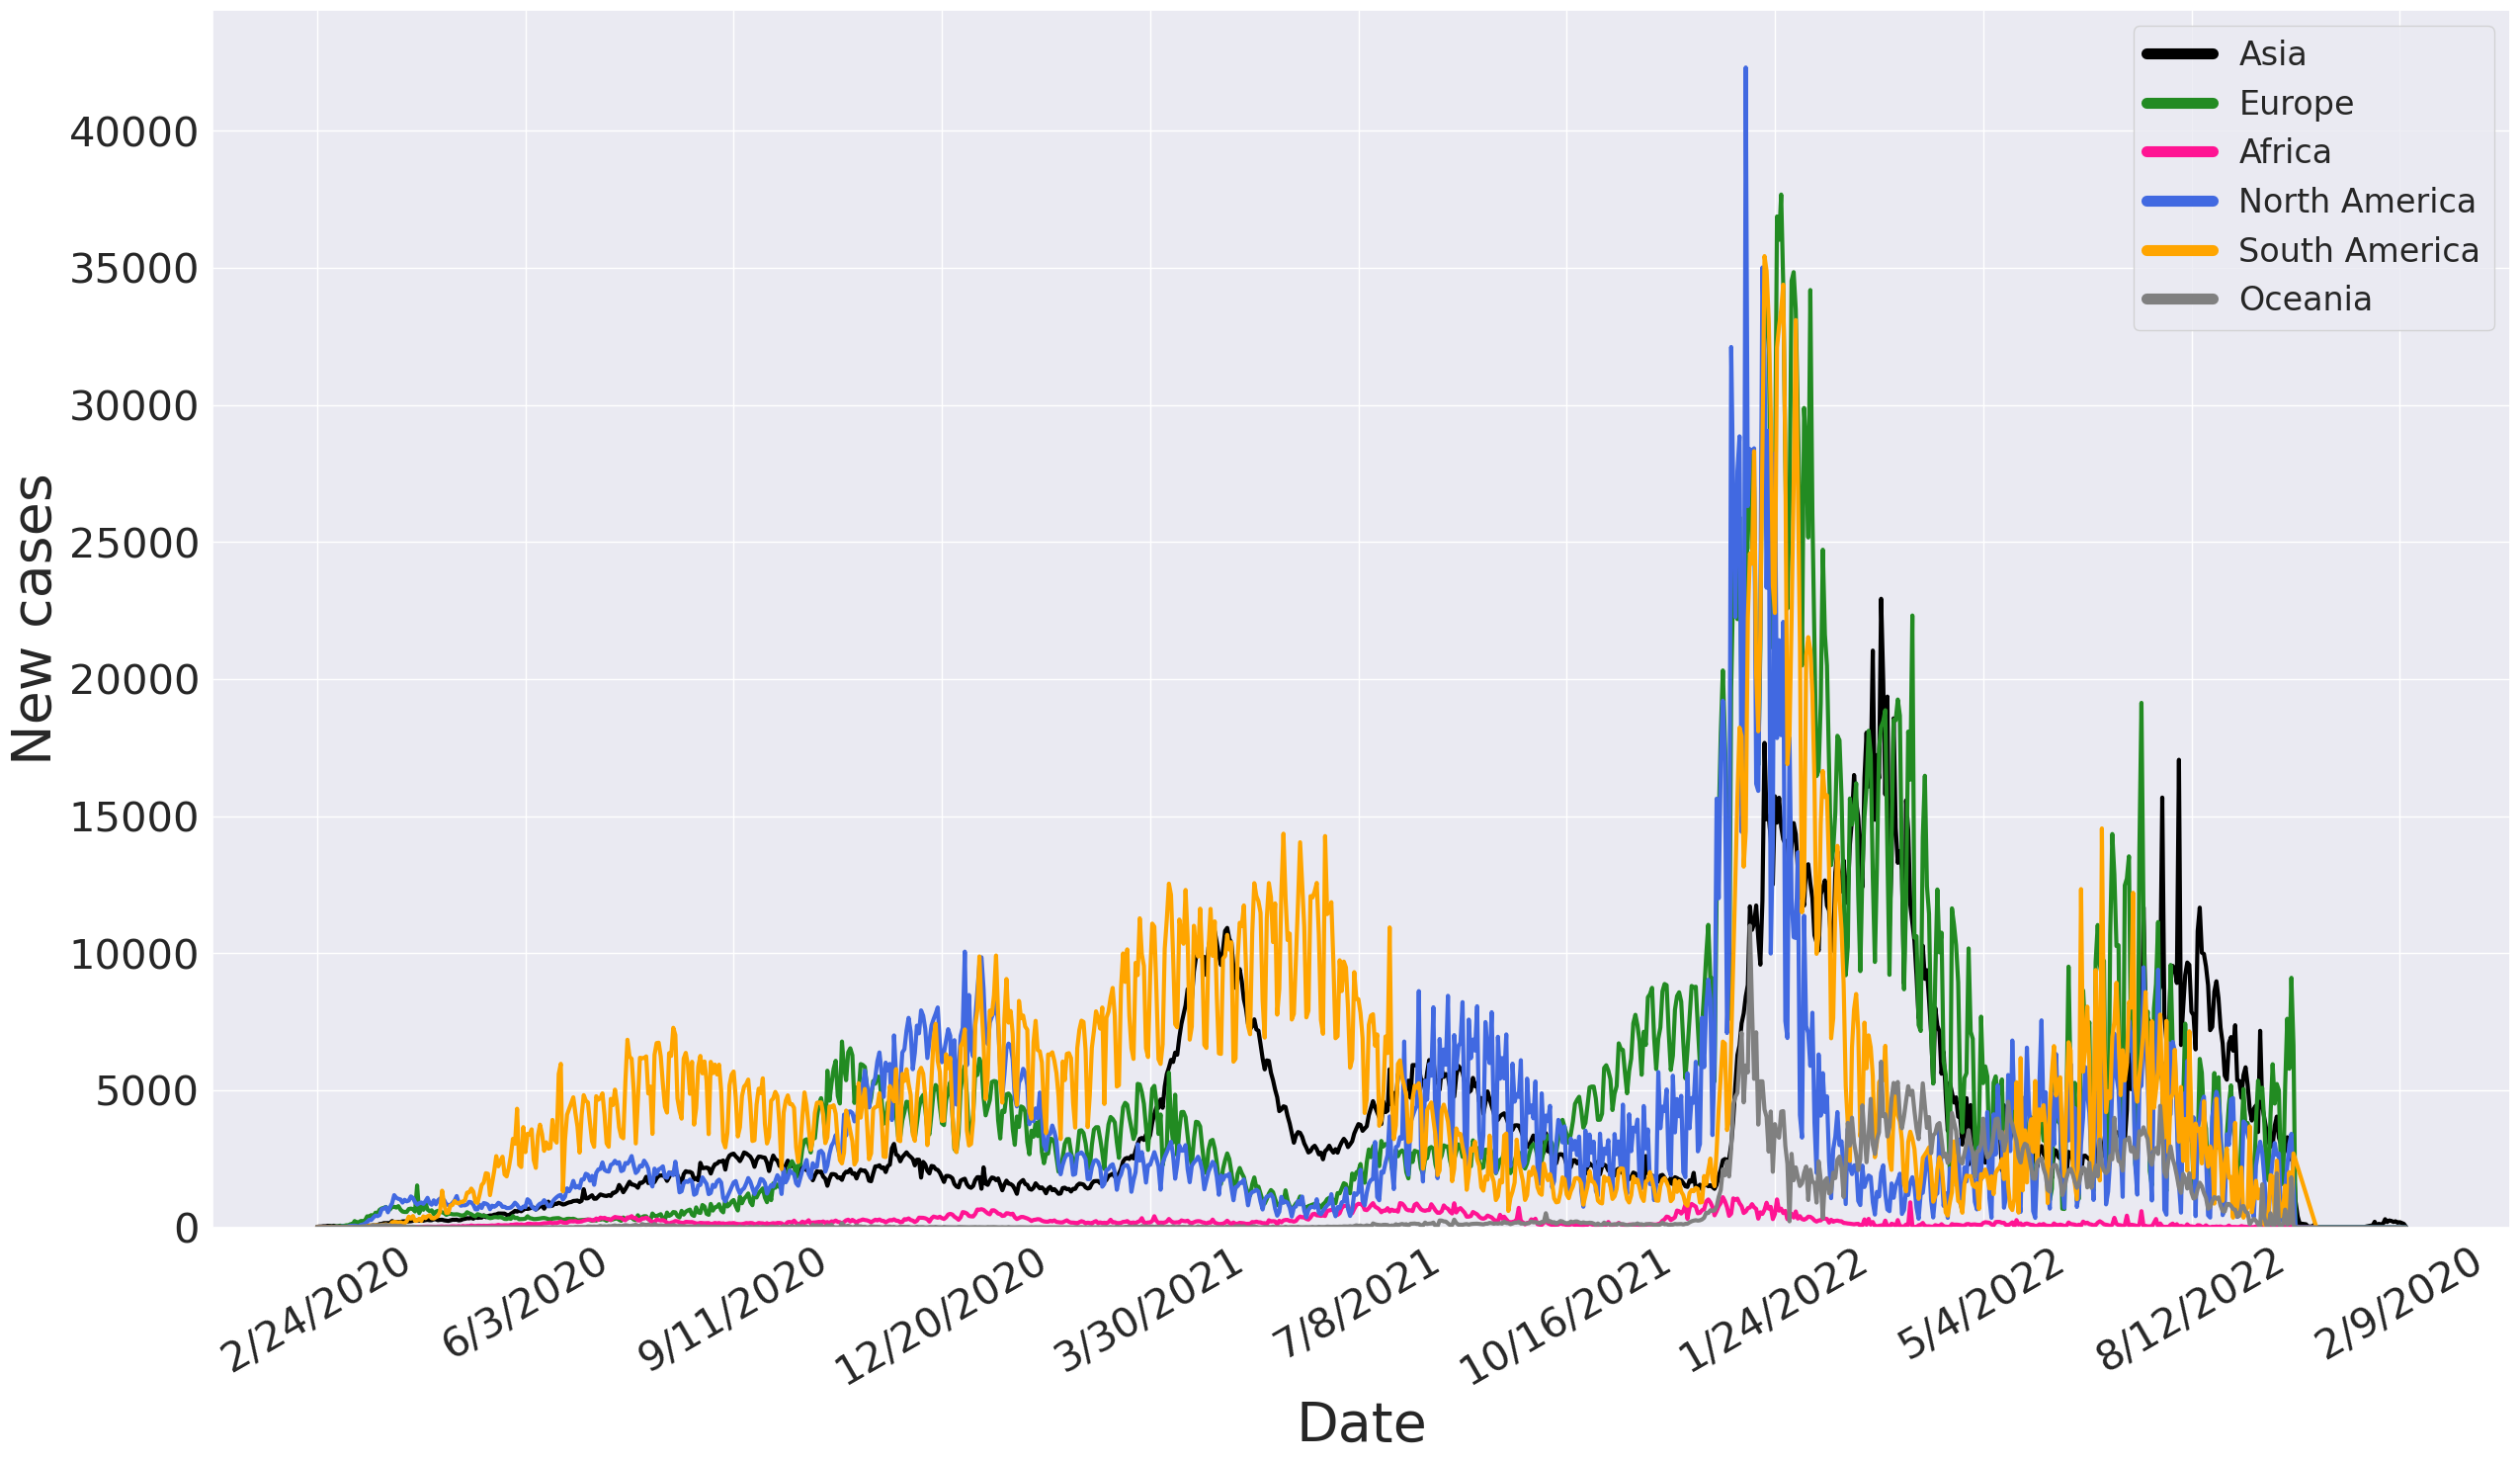

In [62]:
# Let's check out the dinamic of new cases.
fig = sns.lineplot(x="date", y="new_cases", hue="continent", data=covid, errorbar=None, linewidth=3, 
                   palette=["black", "forestgreen", "deeppink", "royalblue", "orange", 'grey'])
plt.xticks(ticks=range(0, 1001, 100), rotation=30)
plt.ylim(0)
plt.xlabel('Date', size=40)
plt.ylabel('New cases', size=40)
leg = plt.legend(prop={'size': 24})
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)

for line in leg.get_lines():
    line.set_linewidth(8.0)

Looks like in the beginning there were a lot of new cases in South America, and not in Asia or Europe. In the end of 2021 and beginning of 2022 there was a peak everywhere.